In [218]:
import numpy as np
import matplotlib.cm as cm

import matplotlib.pyplot as plt
from scipy import signal


In [63]:
def gaus(X, mu, sigma):
    return np.exp(-(X - mu)**2 / (2*sigma**2)) / (np.sqrt(2 * np.pi)*sigma)

In [151]:
def findpeaks(x, y, w):
    index_all = list(signal.argrelmax(y, order=w))
    index = []                                                      
    peaks = []                                                      
    # n個分のピーク情報(指標、値）を格納
    for i in range(len(index_all[0])):
        index.append(index_all[0][i])
        peaks.append(y[index_all[0][i]])
    index = np.array(index) * (x[1] - x[0]) + x[0]
    return index, peaks

In [201]:
def wl_to_rgb(wl):
    center_rgb = np.array([700.0, 546.1, 435.8])
    width_rgb = np.array([90, 80, 80])
    rgb = np.exp(- ((wl - center_rgb)/width_rgb)**2)
    return np.round((255 * rgb/(rgb[0] + rgb[1] + rgb[2])))

In [211]:
wl = np.linspace(201,800,600)
peaks = 400*np.random.rand(30) + 300
height = 1000 * np.random.rand(len(peaks)) + 100
its = np.zeros_like(wl)
for ipeak, peak in enumerate(peaks):
    its = its + height[ipeak]*gaus(wl, peak, 5)
    #print(its)

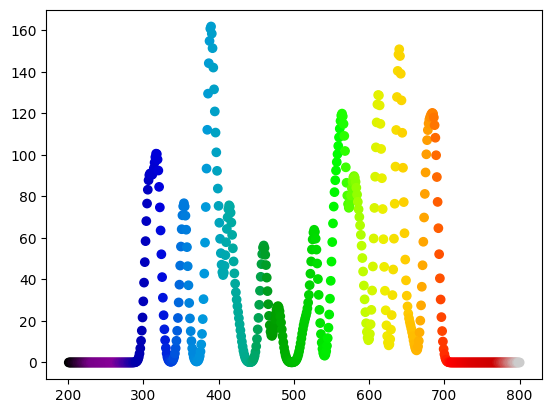

In [220]:
plt.scatter(wl,its,c=wl,cmap=cm.nipy_spectral)

In [213]:
findpeaks(wl, its, 1)

(array([309., 317., 354., 390., 414., 460., 479., 527., 564., 580., 612.,
        640., 684.]),
 [91.01678334027766,
  100.54813298308534,
  76.68266805777927,
  161.79372158468823,
  75.66946228447851,
  56.340041773102804,
  27.139955873995294,
  63.897767809645806,
  119.84659915247911,
  89.76064470533527,
  128.7864669356411,
  150.8211596813401,
  120.18326881096208])

In [214]:
print(peaks)
print(height)

[674.07330336 317.91271953 639.04434661 478.85118266 319.03429721
 615.98595638 527.24501463 554.48444202 398.67448976 610.6367581
 353.98402973 640.66900034 676.44974845 685.77853854 389.09451554
 424.91365431 579.4824033  565.44858976 414.04138424 459.94412477
 562.39704003 588.84228263 612.69651777 388.83103543 573.78926644
 687.59818861 654.19700909 514.78946272 677.68868104 307.12918975]
[ 158.1792101   513.57811508  904.05421002  339.80432128  663.00600817
  184.06190016  790.3393808   874.11172985  789.45559502  441.4069327
  961.07962202 1007.90676329  121.25281158  297.43226192  879.46542884
  257.23278524  906.66709909 1054.44707919  917.44612521  705.88345976
  332.60905044  620.95526693 1065.11126763 1014.68458504  167.00239185
  967.30879214  205.27408964  225.83431941  930.76956817 1016.04788255]


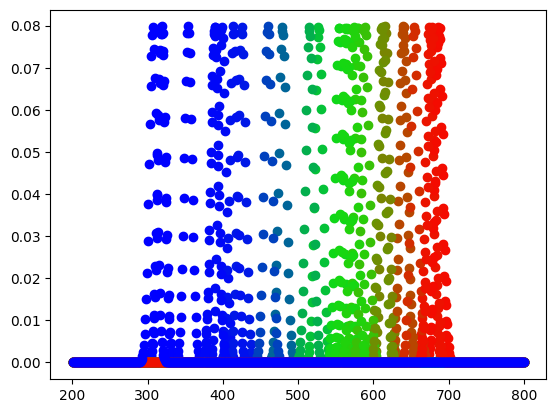

In [216]:

for peak in peaks:
    rgb = wl_to_rgb(peak)
    color_code = '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    plt.scatter(wl,gaus(wl, peak, 5), color=color_code)


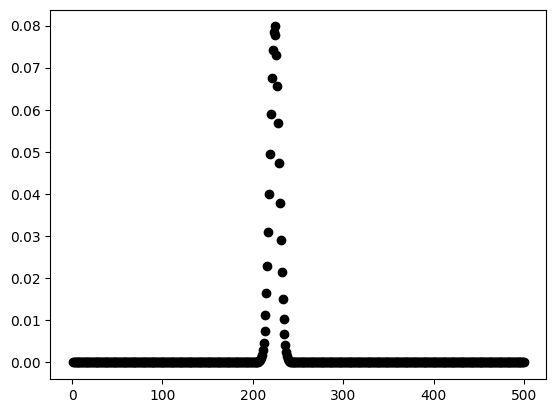